# RDKit CookBook
* 몇 가지 유용한 RDKit의 예시들에 대해서 살펴본다. 
* ref: https://www.rdkit.org/docs/Cookbook.html

In [1]:
import rdkit
print(rdkit.__version__)

2022.03.3


## Atom number 표시하기. 

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [3]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

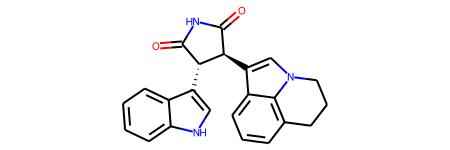

In [4]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

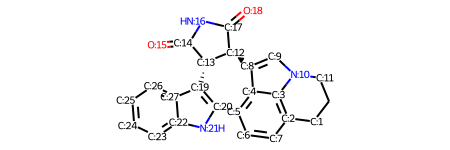

In [5]:
# With atom index
mol_with_atom_index(mol)


In [6]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300

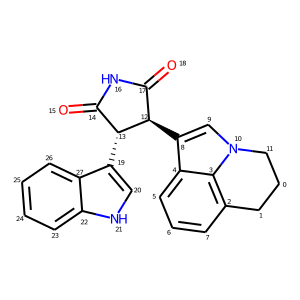

In [7]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
mol

## 계산 결과 포함하기

* 예시: 부분 전하 계산 결과 표시하기

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300

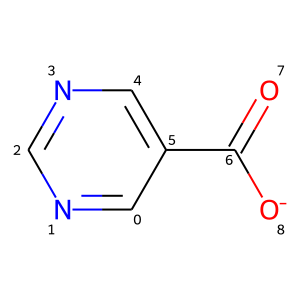

In [9]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
m

* Gasteiger 전하 계산

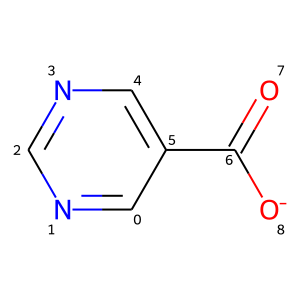

In [10]:
AllChem.ComputeGasteigerCharges(m)
m

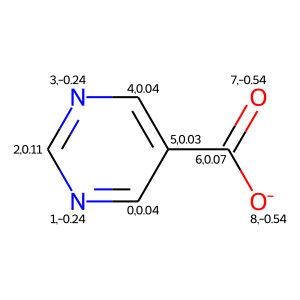

In [11]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
m2

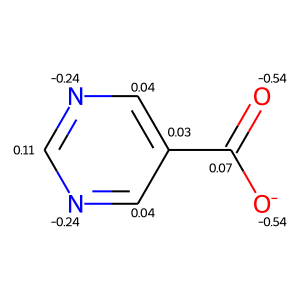

In [12]:
IPythonConsole.drawOptions.addAtomIndices = False
m2

## Stereochemistry 표시하기

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

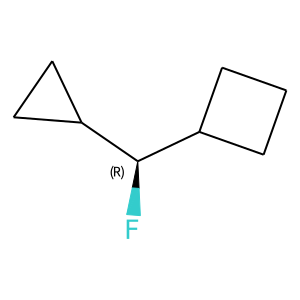

In [14]:
# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m1

## 흑백으로 분자 표시하기 
* Drawoption을 이용해서 다양한 표현할 수 있다. 
* 모든 option에 관한 내용은 아래 reference에서 확인할 수 있다. 
*https://www.rdkit.org/docs/source/rdkit.Chem.Draw.rdMolDraw2D.html#rdkit.Chem.Draw.rdMolDraw2D.MolDrawOptions

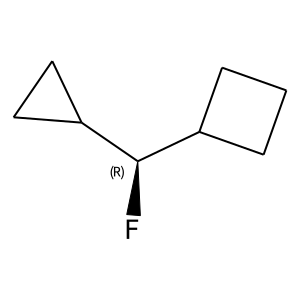

In [15]:
IPythonConsole.drawOptions.useBWAtomPalette()
m1

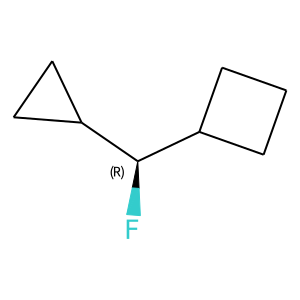

In [16]:
IPythonConsole.drawOptions.useDefaultAtomPalette()
m1

## 특정 구조에 하이라이트 주기

In [17]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


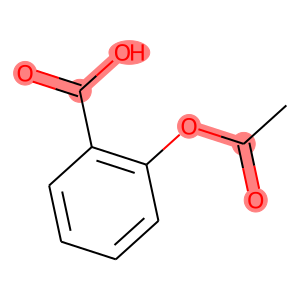

In [18]:
m

* 원하는 원자에 highlight를 줄 수 있다. 

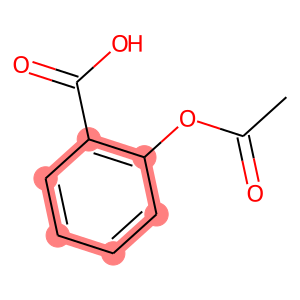

In [19]:
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [0,1,2,6,11,12]
m

## Stereocenter 모두 찾아서 표시
* https://www.rdkit.org/docs/Cookbook.html#stereochemistry

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.molSize = 200,200

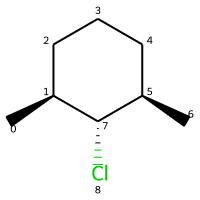

In [23]:
m = Chem.MolFromSmiles("C[C@H]1CCC[C@@H](C)[C@@H]1Cl")
m

In [25]:
print(Chem.FindMolChiralCenters(m,force=True,includeUnassigned=True))

[(1, 'S'), (5, 'R'), (7, 'R')]


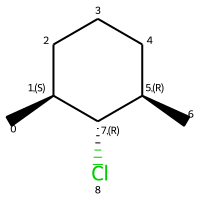

In [26]:
IPythonConsole.drawOptions.addStereoAnnotation = True
m

* Double bond의 stereo 표시하기. 

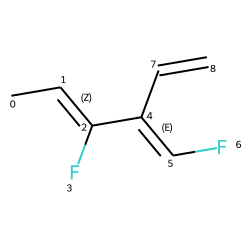

In [27]:
# Identifying Double Bond Stereochemistry
IPythonConsole.molSize = 250,250
mol = Chem.MolFromSmiles("C\C=C(/F)\C(=C\F)\C=C")
mol

* GetStereo 메소드를 이용한다. 

In [28]:
# Using GetStereo()
for b in mol.GetBonds():
    print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(),
          b.GetBondType(),b.GetStereo())

0 1 SINGLE STEREONONE
1 2 DOUBLE STEREOZ
2 3 SINGLE STEREONONE
2 4 SINGLE STEREONONE
4 5 DOUBLE STEREOE
5 6 SINGLE STEREONONE
4 7 SINGLE STEREONONE
7 8 DOUBLE STEREONONE


## 가장 큰 fragment 찾기

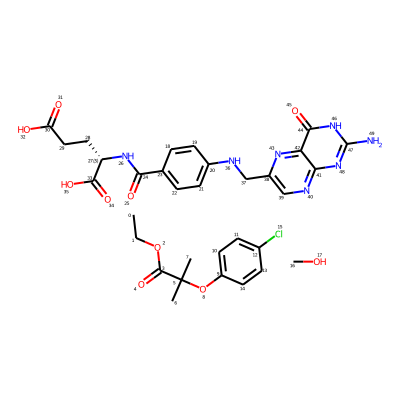

In [29]:
from rdkit import Chem
from rdkit.Chem import rdmolops
IPythonConsole.molSize = 400,400
mol = Chem.MolFromSmiles('CCOC(=O)C(C)(C)OC1=CC=C(C=C1)Cl.CO.C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N')
mol

In [30]:
mol_frags = rdmolops.GetMolFrags(mol, asMols = True)
largest_mol = max(mol_frags, default=mol, key=lambda m: m.GetNumAtoms())
print(Chem.MolToSmiles(largest_mol))

Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc3)nc2c(=O)[nH]1


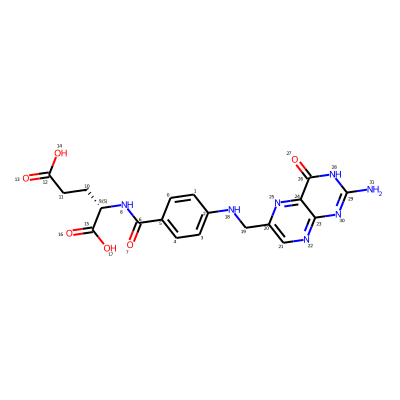

In [31]:
largest_mol

## Finding Macrocycles

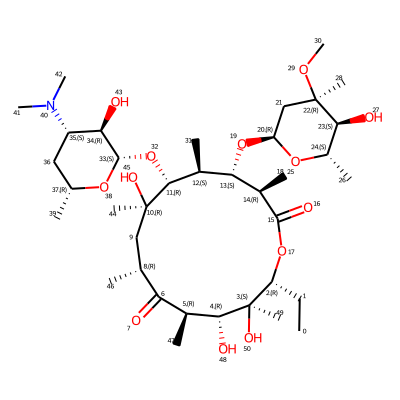

In [32]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
erythromycin = Chem.MolFromSmiles("CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)O)(C)OC)C)O[C@H]3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O")
erythromycin

In [33]:
# Define SMARTS pattern with ring size > 12
# This is an RDKit SMARTS extension
macro = Chem.MolFromSmarts("[r{12-}]")
print(erythromycin.GetSubstructMatches(macro))

((2,), (3,), (4,), (5,), (6,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (17,))


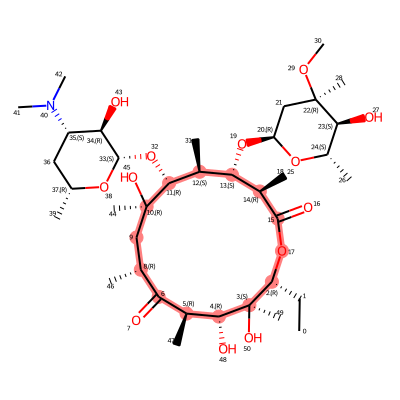

In [34]:
erythromycin

## 다양한 SMILES 생성하기
* https://www.rdkit.org/docs/Cookbook.html#stereochemistry



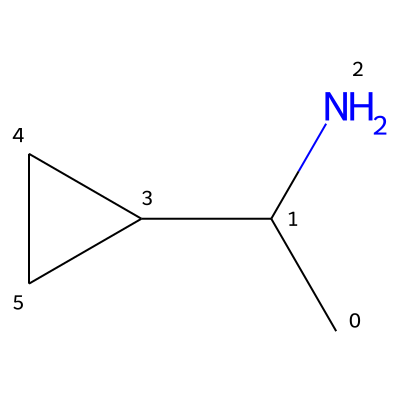

In [35]:
# create a mol object
mol = Chem.MolFromSmiles('CC(N)C1CC1')
mol

In [36]:
# Generate 100 random SMILES
smis = []
for i in range(100):
    smis.append(Chem.MolToSmiles(mol,doRandom=True,canonical=False))

In [37]:
# remove duplicates
smis_set = list(set(smis))
smis_set

['C1CC1C(C)N',
 'CC(N)C1CC1',
 'NC(C1CC1)C',
 'C1C(C1)C(N)C',
 'C1(C(N)C)CC1',
 'C1C(C(C)N)C1',
 'C(C)(C1CC1)N',
 'C(C1CC1)(C)N',
 'C(C1CC1)(N)C',
 'NC(C)C1CC1',
 'C1C(C1)C(C)N',
 'C1(CC1)C(N)C',
 'C(N)(C)C1CC1',
 'C(C)(N)C1CC1',
 'C1(C(C)N)CC1',
 'C1(CC1)C(C)N',
 'C(N)(C1CC1)C',
 'C1CC1C(N)C',
 'C1C(C(N)C)C1',
 'CC(C1CC1)N']